### Understanding the types of missing values 

**1. Missing Completely at Random (MCAR)**

Data is missing entirely by chance and the cause is not related to any other observed or unobserved variable.

For example when a digital weighing scale is out of battries then there will
be missed data which is completely at random.

If data is MCAR, the analysis remains unbiased, although it may lose some statistical power due to reduced sample size.

**2. Missing at Random (MAR)**

MAR data occurs when the probability of data being missing depends only on the observed data and not on the missing data itself. In other words, the missingness can be explained by variables for which you have complete information

For example Older survey respondents are less likely to answer a question about technology use, but within each age group, the missingness is random.

If the missingness can be explained by other observed variables, techniques like multiple imputation can be used to handle the missing data effectively.

**3. Missing Not at Random (MNAR)**

The missingness is related to the unobserved data itself or unmeasured factors. In other words, the reason for the missing data is related to the missing value.

Example: People with lower incomes are less likely to report their income, making the missingness dependent on the income variable itself.

MNAR is the most challenging type of missing data to handle because the missingness mechanism needs to be modeled explicitly, often requiring additional assumptions or data collection.

### Finding out the missing values in a dataset

**We will use a dataset from kaggle to know about missing values and how to handle them**

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv("nfl_data.csv",dtype=object)

**We will count the number of null values using the isna() method that returns true if the value is not present and count those values using the sum() method**

In [34]:
df.isna().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         54218
             ...  
Win_Prob     21993
WPA           4817
airWPA      220738
yacWPA      220956
Season           0
Length: 102, dtype: int64

In [35]:
df.shape

(362447, 102)

**As we saw that there are lots of values missing in the dataset, we must figure out a way to handle this for future data processing**

### Handling Missing values

#### Method 1: Deletion

This involves removing rows or columns with missing values.

It can be problematic if a significant portion of the data is missing. 

Discarding too much data can affect the reliability of your conclusions.

**we can remove the null values using the `dropna()` method**

**Syntasx `dataframe.dropna(axis, how, thresh, subset, inplace)`**

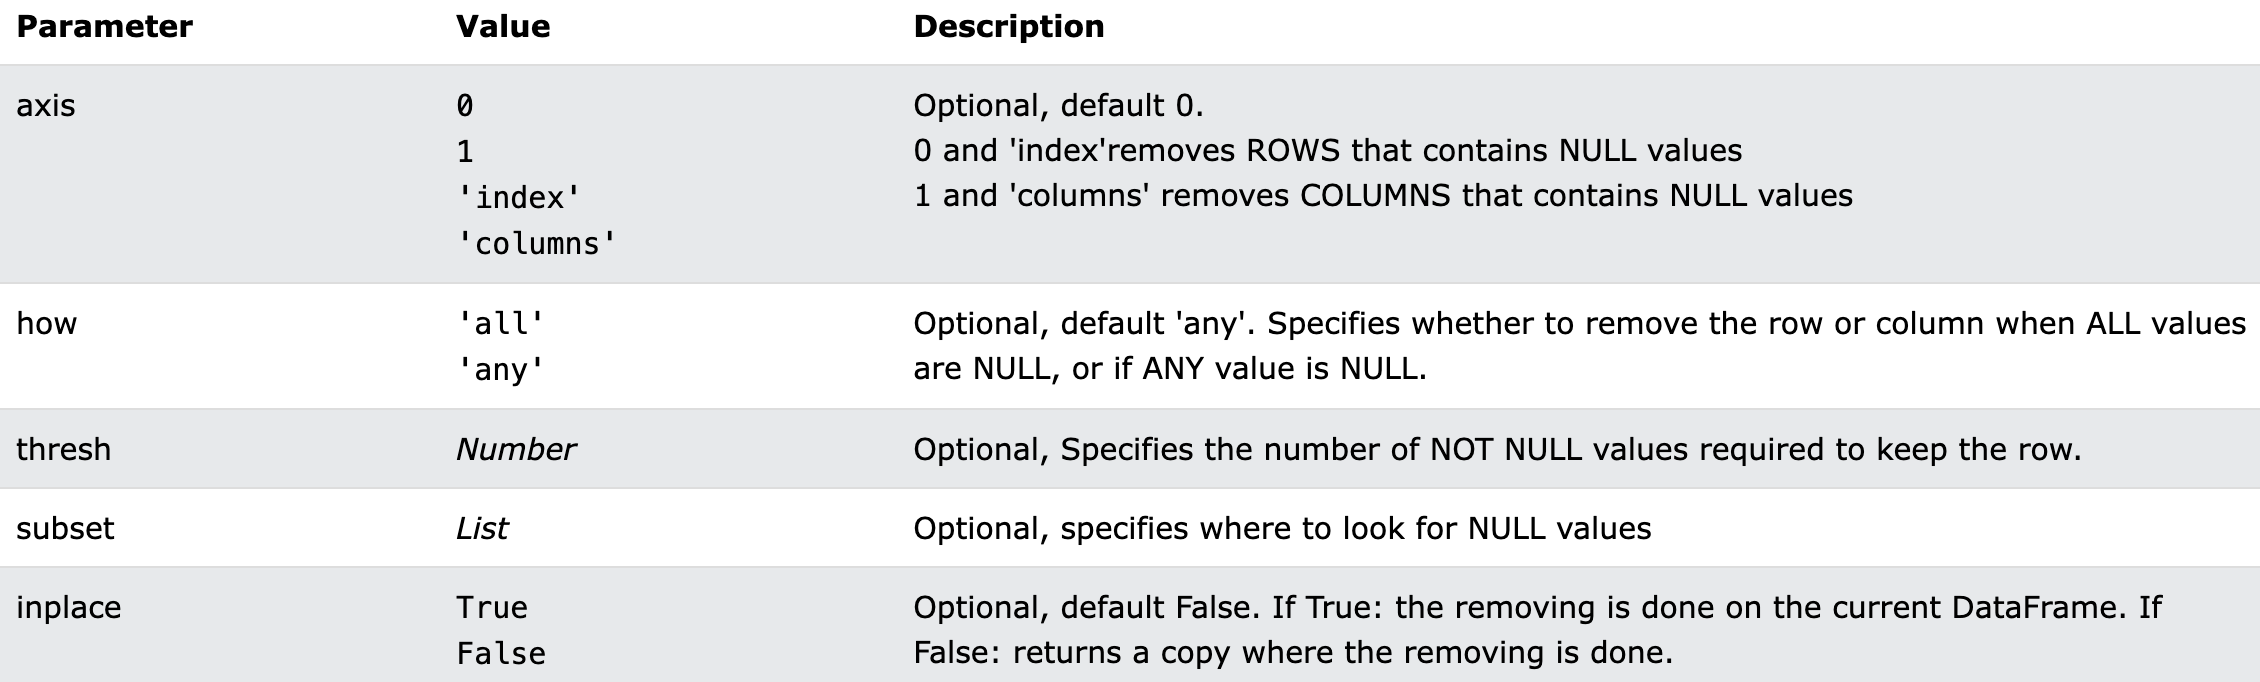

In [47]:
print(df.shape)
df_removed_na_rows = df.dropna()
df_removed_na_rows.shape

(362447, 102)


(0, 102)

**As we can see dropping rows with at least one null value resulted in removing all the data from our dataset, which is not what we wanted so we try other approached**

In [42]:
df_removed_na_columns = df.dropna(axis =1)
df_removed_na_columns.shape

(362447, 37)

**This method removed some values but the lost was significant, we can see how much data we lost by looking at the lost percentage**

In [45]:
prev_colum = df.shape[1]
after_dropping_columns = df_removed_na_columns.shape[1]
lost_percent = after_dropping_columns/prev_colum * 100 
print("{:.2f}".format(lost_percent) + " % data lost")

36.27 % data lost


#### Method 2: Data Impudation